In [1]:
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

# sys.path.append(r"C:\Users\Mike\OneDrive\Project\sdtools")
sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages')


from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2
%matplotlib tk

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:
path = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory"

In [3]:
sys.path.append(r"C:\Users\mikek\OneDrive\Project\python-packages\soledge")
import types
import os
import h5py
from math													import sqrt, exp
import numpy											as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot							as pyp
from matplotlib.backends.backend_pdf	import PdfPages

from routines.h5_routines							import h5_read
from routines.intersect_contour				import intersect_2contours
from routines.utils_walls							import get_in_out_walls, plot2d_walls, get_dmax_points_walls
from routines.set_profile_from_filedata	import set_profile_from_filedata
from routines.exp_data_routines				import get_exp_data_point
from routines.globals									import DEBUG, KB, BALLOONING_NAMES

from mesh.get_rz_core_sep						import get_rz_core_sep
from mesh.get_rho_in_out_core_sep		import get_rho_in_out_core_sep
from mesh.find_zones_intersections			import find_zones_intersections
from mesh.compute_mesh_intersections	import compute_mesh_intersections

from files.load_soledge_mesh_file				import load_soledge_mesh_file
from files.load_plasma_files						import load_plasma_files
from files.load_fluxes_files							import load_fluxes_files
from files.load_ions_list								import load_ions_list
from files.load_text_data							import load_text_data
from files.load_refpar_file							import load_refpar_file
from files.load_input_file							import load_input_file
from files.load_exp_descr							import load_exp_descr
from files.load_exp_data							import load_exp_data
from files.load_transports_coefficients		import load_transports_coefficients
from files.save_stat									import save_stat

In [14]:
Plasmas = load_plasma_files(path, nZones=0, Evolution=0, iPlasmas=[0,1])

	load_plasma_files: Loading:  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory/Results/plasma_0
	load_plasma_files: Loading:  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory/Results/plasma_1


- Neutrals are in Plasmas[1][0].Triangles.

In [13]:
Plasmas[1][0].Triangles.VNames

['Densi',
 'Tempi',
 'velocityi',
 'IRadi',
 'NRadi',
 'Sni',
 'SEi',
 'SGi',
 'Nni',
 'Tni',
 'vxni',
 'vyni',
 'vzni',
 'Nmi',
 'Tmi',
 'Pni',
 'vxmi',
 'vymi',
 'vzmi',
 'Ntii',
 'Pni',
 'TotRadi',
 'Mi',
 'Ppi',
 'Epi',
 'TDensi',
 'TDensei',
 'FracDensi',
 'Cimpi',
 'FracDensei',
 'Zavei']

In [18]:
from matplotlib import tri
if_tri	 = h5py.File(os.path.join(path,"triangles.h5"), "r")
TriKnots = h5_read(if_tri,"triangles/tri_knots")
TriKnots = TriKnots - 1 										#Matlab/Fortan to python indexes
R		 = h5_read(if_tri,"knots/R")*0.01
Z		 = h5_read(if_tri,"knots/Z")*0.01
if_tri.close()
TripTriang = tri.Triangulation(R, Z, triangles=TriKnots)

In [ ]:
len(TripTriang.edges)

In [42]:
from mesh.get_rz_core_sep import *

In [4]:
Config = load_soledge_mesh_file(os.path.join(path,"mesh.h5"))

load_soledge_mesh_file: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory\mesh.h5
	load_soledge_mesh_file: in_equ = OK
	h5_read: error reading:  /mesher/Fields/RadArroundXp
	load_soledge_mesh_file: extrapol = OK
	load_soledge_mesh_file: xPoints = OK
	load_soledge_mesh_file: Frontiers = OK
	load_soledge_mesh_file: Limits = OK
	h5_read: error reading:  /mesher/OMP_segment/mesher/refpoints/nPoints
	load_soledge_mesh_file: Segments = OK
	load_soledge_mesh_file: MagGrid_OK = OK
	load_soledge_mesh_file: new_equ = OK
	load_soledge_mesh_file: equ = OK
	load_soledge_mesh_file: Mesh = OK
	load_soledge_mesh_file: transp_prof = OK
	load_soledge_mesh_file: transp_values = OK
	h5_read: error reading:  /mesher/FeedbackTransp/Dmin
	load_soledge_mesh_file: feedback_transp = NO
	h5_read: error reading:  /mesher/FeedbackPuffing/AutoTarget
	load_soledge_mesh_file: feedback_puffing = NO
	h5_read: error reading:  /CustomPlots/Parallel/nPlots
	h5_read: error reading:  /Cust

TypeError: 'types.SimpleNamespace' object is not subscriptable

In [47]:


fig, ax = plt.subplots()


get_rz_core_sep
get_rz_core_sep: completed


In [16]:
%matplotlib inline

get_rz_core_sep
get_rz_core_sep: completed


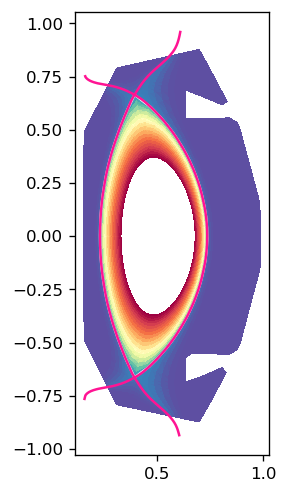

In [74]:
param = "Dense"
if param.endswith("e"):
    # Electrons are index 0
    species_idx = 0
elif param.endswith("i"):
    # Ions and neutrals are index 1
    species_idx = 1
else:
    raise Exception("Parameter name must end in e or i")

iPar = Plasmas[species_idx][0].Triangles.VNames.index(param)	
plot_data = Plasmas[1][0].Triangles.Values[iPar]
vmin = min(plot_data)
vmax = max(plot_data)
RZcore, RZsep, CoreMegazone, SepMegazone, jSep = get_rz_core_sep(Config, use_mag_zones=True)

fig, ax = plt.subplots(dpi = 120)

ax.tripcolor(TripTriang, plot_data, norm = None, cmap = "Spectral_r")
ax.plot(RZsep[:,0], RZsep[:,1], color = "white")
ax.set_aspect("equal")

def get_rz_sep(Config):
    """
    Queries grid regions to obtain separatrix R and Z coordinates
    Extends to the equilibium boundary
    Requires a Config (grid/eqb) file with MagZones computed
    Returns lhs and rhs for each of the sides of the separatrix for easy contiguous line plots
    Those are dicts with keys R and Z for the respective coords
    """
    sep = dict()
    sep["UOT"] = Config.MagZones[2].north
    sep["UIT"] = Config.MagZones[3].north
    sep["LIT"] = Config.MagZones[4].north
    sep["LOT"] = Config.MagZones[5].north

    sep["ISEP"] = Config.MagZones[0].north
    sep["OSEP"] = Config.MagZones[1].north

    lhs = dict()
    rhs = dict()
    for coord in ["R", "Z"]:
        # lhs[coord] = np.
        lhs[coord] = sep["LIT"].__dict__[coord]
        lhs[coord] = np.concatenate([lhs[coord], sep["ISEP"].__dict__[coord]])
        lhs[coord] = np.concatenate([lhs[coord], sep["UIT"].__dict__[coord]])
        rhs[coord] = sep["UOT"].__dict__[coord]
        rhs[coord] = np.concatenate([rhs[coord], sep["OSEP"].__dict__[coord]])
        rhs[coord] = np.concatenate([rhs[coord], sep["LOT"].__dict__[coord]])
        
    return lhs, rhs

zone = Config.MagZones[1].north
ax.plot(lhs["R"], lhs["Z"], color = "deeppink")
ax.plot(rhs["R"], rhs["Z"], color = "deeppink")

In [60]:
np.array(0)

array(0)

In [49]:
%matplotlib inline